In [1]:
%pip install rwkv-x

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Проверка, что модель запускается

In [3]:
# !!! set these before import RWKV !!!
import os
os.environ["RWKV_CUDA_ON"] = '0' # '1' to compile CUDA kernel (10x faster), requires c++ compiler & cuda libraries
from rwkv_x.model import RWKV_X
from rwkv_x.utils import PIPELINE, PIPELINE_ARGS

# Load model
# You can get the model weights from: https://huggingface.co/howard-hou/RWKV-X/
model = RWKV_X(model_path='models\RWKV-X-0.2B-64k-Base.pth', strategy='cuda fp16')
pipeline = PIPELINE(model)

# Set generation parameters
args = PIPELINE_ARGS(
    temperature=1.0,
    top_p=0.7,
    top_k=100,
    alpha_frequency=0.25,
    alpha_presence=0.25,
    token_ban=[],
    token_stop=[],
    chunk_len=256
)

# Generate text
ctx = "This is a sample prompt."
output = pipeline.generate(ctx, token_count=200, args=args)
print(output)

Loading models\RWKV-X-0.2B-64k-Base.pth (cuda fp16)

 If you want to see the exact sample I used, check out the link.
(The PDF file is available on Google Drive)
When you complete this assignment, you will receive a unique code. To complete the assignment, click on the Assignment code button below. It will take you to the specific Assignment code for that specific task.
Step 1: Make sure that you have an account with Codefork.
Step 2: Open your profile page.
Step 3: Click on the “My Account” tab and enter your email address.
Step 4: Click on the “New Account” button and complete your initial configuration.
Step 5: Once your account is set up, you will be able to connect to Codefork and create a new task.
The task should be in Word document format. The content of the task should include the following:
- (Choose one or more) To complete this assignment, it should be completed within 2-3 days of the start of


In [4]:
%pip install -e ./LLMTest_NeedleInAHaystack

Obtaining file:///C:/Users/Anastasia/Desktop/rwkv-x-niah%20%E2%80%94%20%D0%BA%D0%BE%D0%BF%D0%B8%D1%8F/LLMTest_NeedleInAHaystack
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Using cached typing_extensions-4.8.0-py3-none-any.whl.metadata (3.0 kB)
Using cached typing_extensions-4.8.0-py3-none-any.whl (31 kB)
  Building editable for needlehaystack (pyproject.toml): started
  Building editable for needlehaystack (pyproject.toml): finished with status 'done'
  Created wheel for needlehaystack: filename=needlehaystack-0.1.0-0.editable-py3-none-any.

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.7.1+cu118 requires typing-extensions>=4.10.0, but you have typing-extensions 4.8.0 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Тест провайдера RWKVX

In [5]:
from needlehaystack.providers.rwkvx import RWKVX

provider = RWKVX(
    model_name="RWKV-X-0.2B-64k-Base"
)

prompt = """
The secret number is 98765.

What is the secret number?
"""

output = provider.generate(prompt, max_new_tokens=9)
print("Ответ модели:", output)

Loading models\RWKV-X-0.2B-64k-Base.pth (cuda fp16)

Ответ модели: The secret number is 98765.


Тест QwenEvaluator

In [6]:
from needlehaystack.evaluators.qwen import QwenEvaluator

evaluator = QwenEvaluator(true_answer="large language models")

score = evaluator.evaluate_response(
    "Large language models are neural networks trained on massive text corpora."
)

print(score)

10


## Запуск

In [7]:
from needlehaystack.llm_needle_haystack_tester import LLMNeedleHaystackTester
from needlehaystack.providers.rwkvx import RWKVX
from needlehaystack.evaluators.qwen import QwenEvaluator

In [8]:
%pip install nest_asyncio

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import nest_asyncio
nest_asyncio.apply()

In [ ]:
models = ["RWKV-X-0.2B-64k-Base", "RWKV-X-0.2B-64k-Instruct", "RWKV-X-3.6B-64k-Base"]

In [ ]:
for model in models:
    provider = RWKVX(model_name=model)

    evaluator = QwenEvaluator(
        true_answer="The best thing to do in San Francisco is eat a sandwich and sit in Dolores Park on a sunny day."
    )

    tester = LLMNeedleHaystackTester(
        model_to_test=provider,
        evaluator=evaluator,

        needle="The best thing to do in San Francisco is eat a sandwich and sit in Dolores Park on a sunny day.",
        haystack_dir="PaulGrahamEssays",
        retrieval_question="What is the best thing to do in San Fransisco?",

        context_lengths=[256, 512, 1024, 2048, 4096, 8192],
        document_depth_percents=[1, 5, 10, 25, 50, 75, 90, 95, 99],
 
        num_concurrent_requests=1,
        print_ongoing_status=True,

        save_results=True,
        save_contexts=True
    )

    tester.start_test()

Loading models\RWKV-X-3.6B-64k-Base.pth (cuda fp16)



Starting Needle In A Haystack Testing...
- Model: RWKV-X-3.6B-64k-Base
- Context Lengths: 1, Min: 8192, Max: 8192
- Document Depths: 9, Min: 1%, Max: 99%
- Needle: The best thing to do in San Francisco is eat a sandwich and sit in Dolores Park on a sunny day.



-- Test Summary -- 
Duration: 129.5 seconds
Context: 8192 tokens
Depth: 1%
Score: 1
Response: Want to start a startup?  Get funded by
Y Combinator.

Want to start a startup?  Get funded by
Y Combinator.

Want to start a startup?  Get funded by
Y Combinator.

Want to start a startup?  Get funded by
Y Combinator.

Want to start a startup?  Get funded by
Y Combinator.

Want to start a startup?  Get funded by
Y Combinator.

Want to start a startup?  Get funded by
Y Combinator.

Want to start a startup?  Get funded by
Y Combinator.

-- Test Summary -- 
Duration: 124.5 seconds
Context: 8192 tokens
Depth: 5%
Score: 1
Response: Want to start a startup?  Get funded by
Y Combinator.


## Визуализация результатов

In [12]:
models = ["RWKV-X-0.2B-64k-Base", "RWKV-X-0.2B-64k-Instruct", "RWKV-X-3.6B-64k-Base"]

In [13]:
%pip install pandas seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import json
import os
import glob
import re

In [15]:
def load_results_for_model(model_name: str, base_dir="results"):
    pattern = os.path.join(base_dir, f"{model_name.replace('.', '_')}_*.json")
    files = glob.glob(pattern)

    rows = []

    for file in files:
        filename = os.path.basename(file)

        m = re.search(r"_len_(\d+)_depth_(\d+)_results.json", filename)
        if not m:
            continue
        
        context_length = int(m.group(1))
        depth_raw = int(m.group(2))
        depth_percent = depth_raw / 100

        with open(file, "r") as f:
            data = json.load(f)
        
        rows.append({
            "Model": model_name,
            "Context Length": context_length,
            "Document Depth": depth_percent,
            "Score": data.get("score"),
            "File": filename
        })
    
    if not rows:
        raise ValueError(f"No results found for model {model_name}")

    return pd.DataFrame(rows)

In [16]:
dfs = []
for model in models:
    df_model = load_results_for_model(model, "results")
    dfs.append(df_model)

df_all = pd.concat(dfs, ignore_index=True)

print("Loaded rows:", len(df_all))
df_all.head()


Loaded rows: 162


,Model,Context Length,Document Depth,Score,File
0,RWKV-X-0.2B-64k-Base,1024,10.0,1,RWKV-X-0_2B-64k-Base_len_1024_depth_1000_resul...
1,RWKV-X-0.2B-64k-Base,1024,1.0,1,RWKV-X-0_2B-64k-Base_len_1024_depth_100_result...
2,RWKV-X-0.2B-64k-Base,1024,25.0,1,RWKV-X-0_2B-64k-Base_len_1024_depth_2500_resul...
3,RWKV-X-0.2B-64k-Base,1024,50.0,1,RWKV-X-0_2B-64k-Base_len_1024_depth_5000_resul...
4,RWKV-X-0.2B-64k-Base,1024,5.0,1,RWKV-X-0_2B-64k-Base_len_1024_depth_500_result...


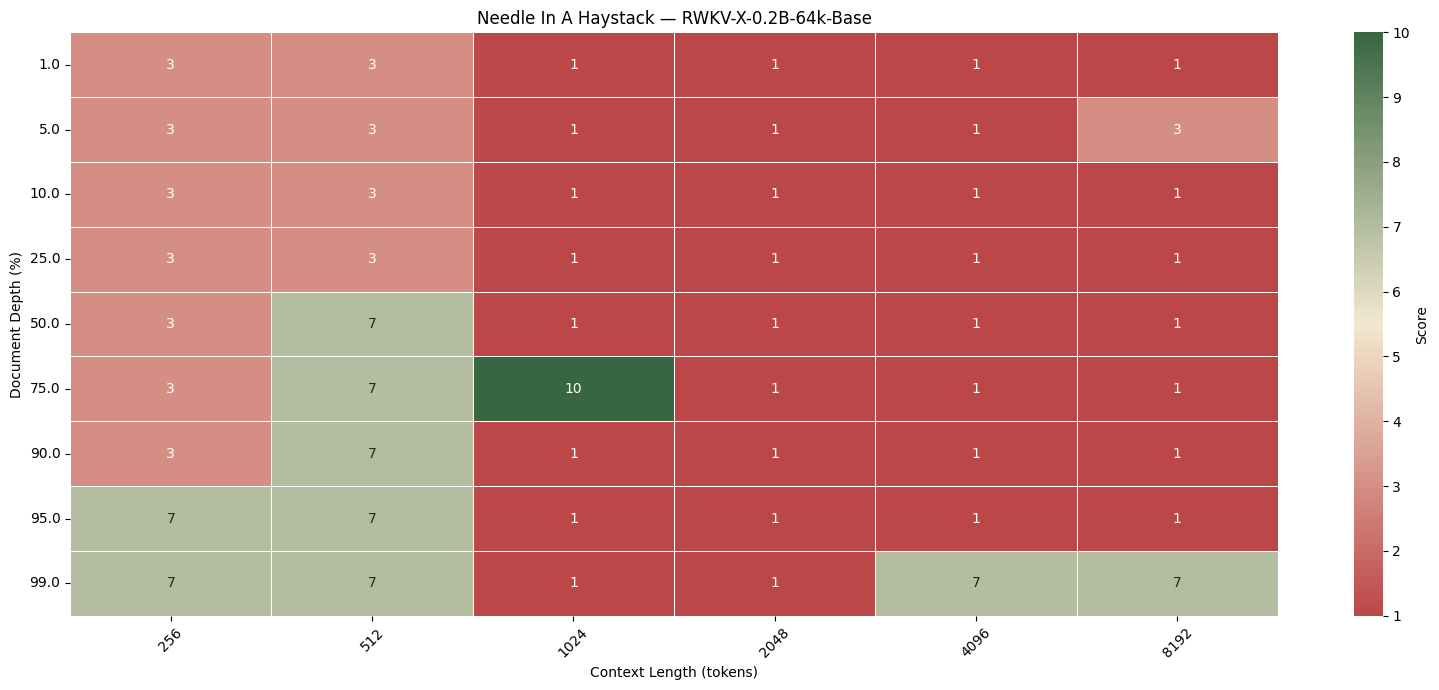

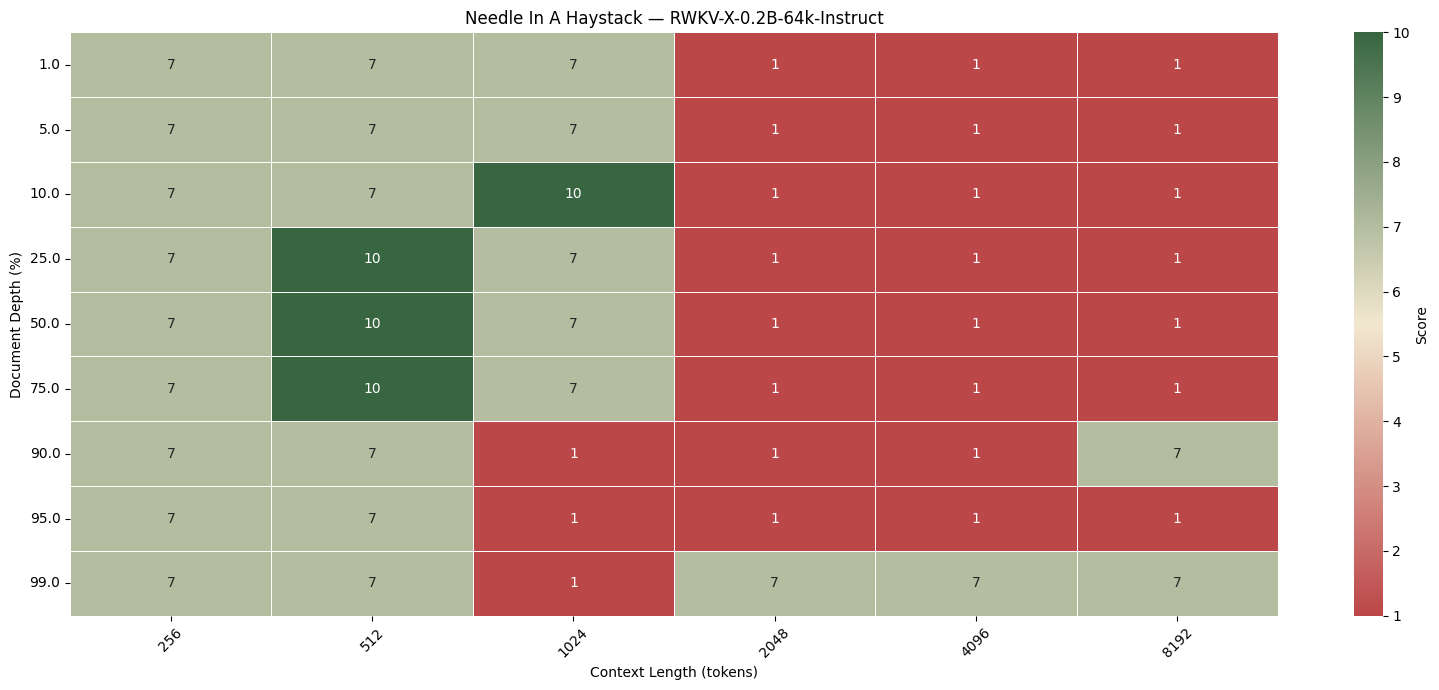

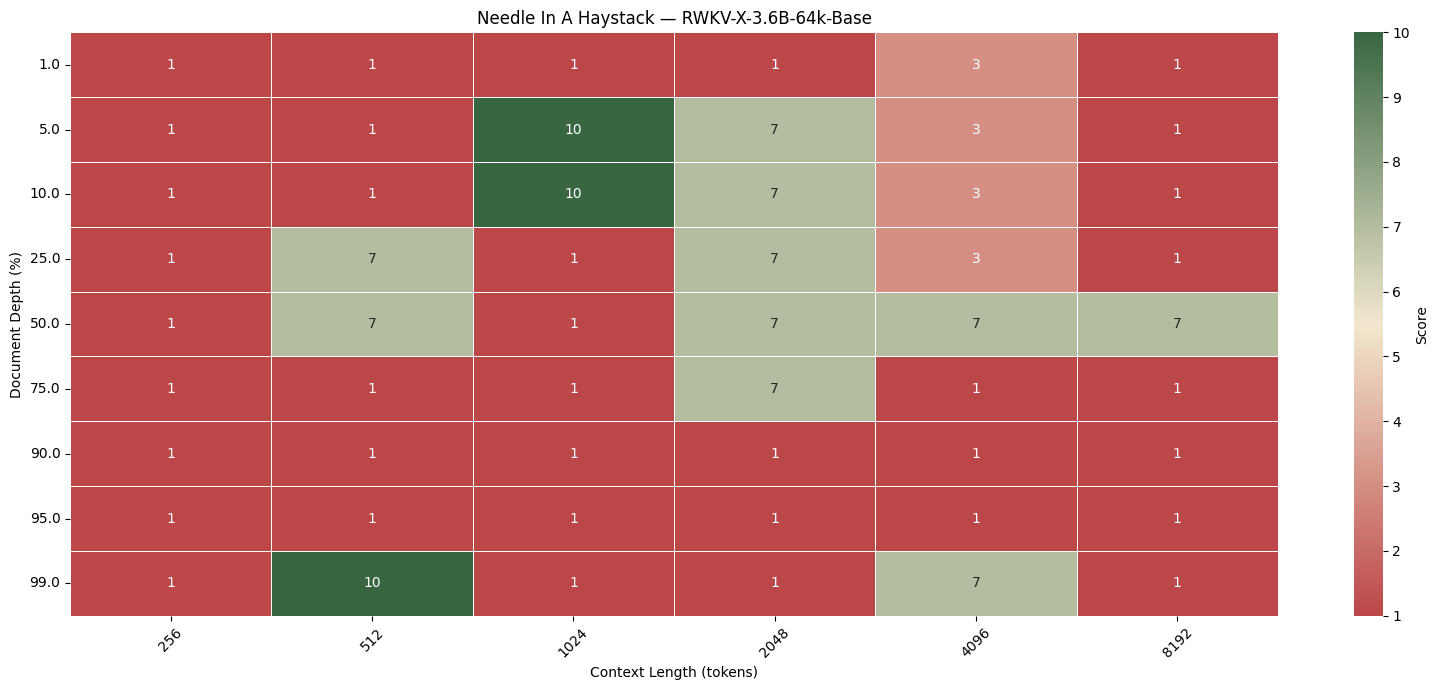

In [19]:
cmap = LinearSegmentedColormap.from_list("custom_map", ["#bc4749", "#f2e8cf", "#386641"])

for model in models:
    df = df_all[df_all["Model"] == model]

    pivot = pd.pivot_table(
        df,
        values="Score",
        index="Document Depth",
        columns="Context Length",
        aggfunc="mean"
    )

    plt.figure(figsize=(16, 7))
    sns.heatmap(
        pivot,
        annot=True,
        cmap=cmap,
        cbar_kws={"label": "Score"},
        linewidths=0.5,
        linecolor="white"
    )

    plt.title(f'Needle In A Haystack — {model}')
    plt.xlabel("Context Length (tokens)")
    plt.ylabel("Document Depth (%)")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


In [18]:
summary = (
    df_all
    .groupby("Model")["Score"]
    .mean()
    .reset_index()
    .sort_values("Score", ascending=False)
)

summary

,Model,Score
1,RWKV-X-0.2B-64k-Instruct,4.333333
2,RWKV-X-3.6B-64k-Base,2.759259
0,RWKV-X-0.2B-64k-Base,2.611111
